In [ ]:
#You are given bhp.csv which contains property prices in the city of banglore, India.
#You need to examine price_per_sqft column and do following,

#(1) Remove outliers using percentile technique first.
#Use [0.001, 0.999] for lower and upper bound percentiles

#(2) After removing outliers in step 1, you get a new dataframe.

#(3) On step(2) dataframe, use 4 standard deviation to remove outliers

#(4) Plot histogram for new dataframe that is generated after step (3).
#Also plot bell curve on same histogram

#(5) On step(2) dataframe, use zscore of 4 to remove outliers.
#This is quite similar to step (3) and you will get exact same result

In [3]:
import pandas as pd
df=pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

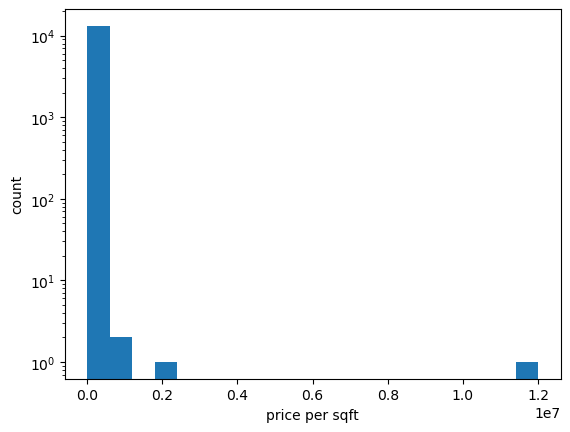

In [4]:
import matplotlib.pyplot as plt
plt.hist(df.price_per_sqft,bins=20)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

In [8]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

#The .quantile() function works by:Sorting the data in ascending order.
#Calculating the value at the given percentile(s) in that sorted list.

(1366.184, 50959.36200000098)

In [28]:
outliers=df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083


In [9]:
df2= df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape
#we removed 28 outliers.

(13172, 7)

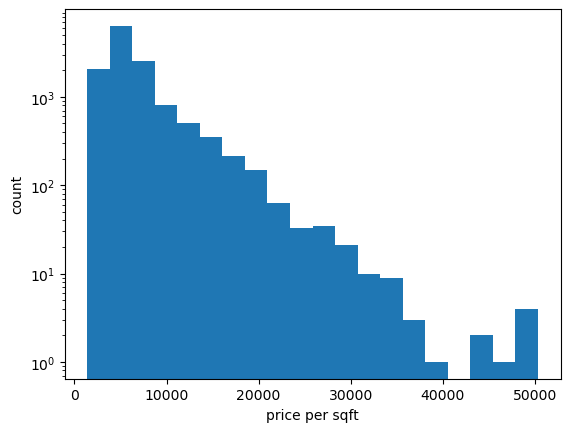

In [33]:
plt.hist(df2.price_per_sqft,bins=20)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

In [21]:
price_mean=df2.price_per_sqft.mean()
print(price_mean)

price_std=df2.price_per_sqft.std()
print(price_std)

6663.6537351958705
4141.020700174606


In [22]:
upperlimit2 = price_mean + 4*price_std
upperlimit2

np.float64(23227.73653589429)

In [27]:
lowerlimit2 = price_mean - 4*price_std
lowerlimit2

np.float64(-9900.429065502552)

In [28]:
df3=df2[df2.price_per_sqft>23227]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [10]:
df3=df2[df2.price_per_sqft<23227]
df3.shape

#therefore we removed 125 outliers

(13047, 7)

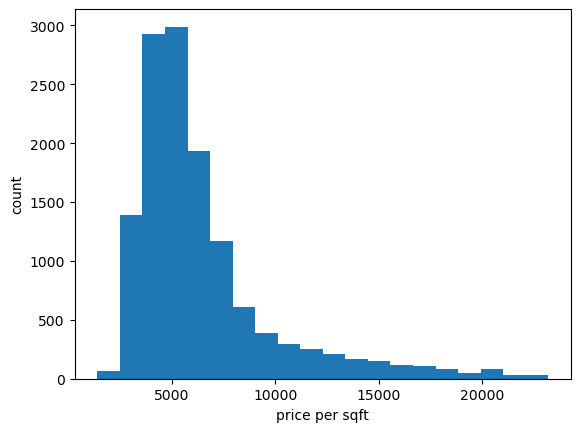

In [56]:
plt.hist(df3.price_per_sqft,bins=20)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.show()

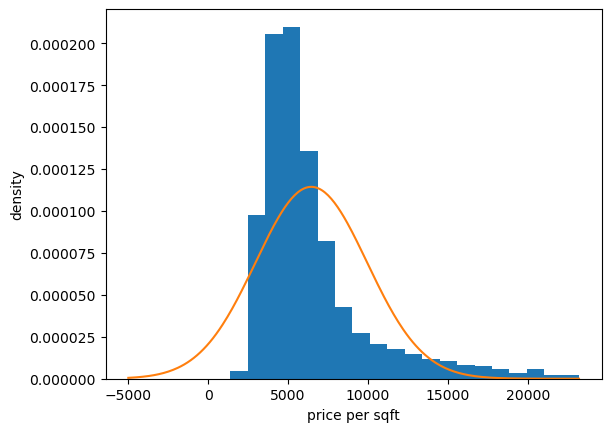

In [17]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft,bins=20,density=True)
plt.xlabel('price per sqft')
plt.ylabel('density')

rng=np.arange(-5000,df3.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

#np.arange() is a NumPy function that creates arrays of evenly spaced values.
#np.arange(start,stop,step).

In [34]:
df2['Zscore']=(df2.price_per_sqft-price_mean)/price_std
df2

/var/folders/v_/rnj0pm997lbc_xm2h5t1z2gm0000gn/T/ipykernel_62675/3438920958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Zscore']=(df2.price_per_sqft-price_mean)/price_std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [38]:
df3=df2[(df2.Zscore < 4.0) & (df2.Zscore > -4.0)]
df3.shape

(13047, 8)